In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [63]:
data.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
36746,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39498,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5963,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26503,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6216,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26164,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17467,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9779,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4213,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [65]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [66]:
data.shape

(42000, 785)

In [67]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [68]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [69]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [70]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[0 8 0 ... 0 9 0] [5 9 5 ... 3 2 9]
0.091
Iteration:  10
[0 7 2 ... 7 6 9] [5 9 5 ... 3 2 9]
0.21221951219512195
Iteration:  20
[0 7 2 ... 7 6 9] [5 9 5 ... 3 2 9]
0.2728780487804878
Iteration:  30
[0 7 2 ... 2 6 9] [5 9 5 ... 3 2 9]
0.32297560975609757
Iteration:  40
[0 7 2 ... 2 6 9] [5 9 5 ... 3 2 9]
0.3688048780487805
Iteration:  50
[0 7 2 ... 2 6 9] [5 9 5 ... 3 2 9]
0.41329268292682925
Iteration:  60
[0 7 3 ... 2 6 9] [5 9 5 ... 3 2 9]
0.4539268292682927
Iteration:  70
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.49658536585365853
Iteration:  80
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.5433414634146342
Iteration:  90
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.5796341463414634
Iteration:  100
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.6075121951219512
Iteration:  110
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.6297317073170732
Iteration:  120
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.6499512195121951
Iteration:  130
[5 7 3 ... 3 6 9] [5 9 5 ... 3 2 9]
0.6680731707317074
Iteration:  140
[5 7 3 ...

In [72]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


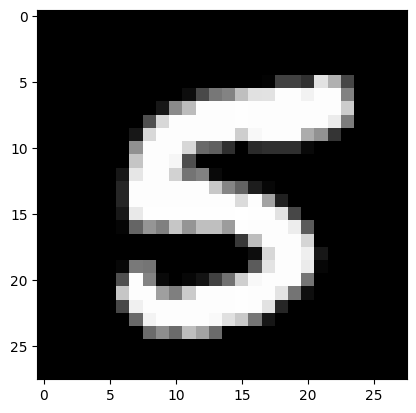

Prediction:  [9]
Label:  9


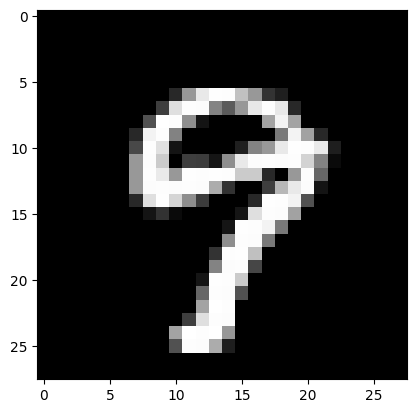

Prediction:  [3]
Label:  5


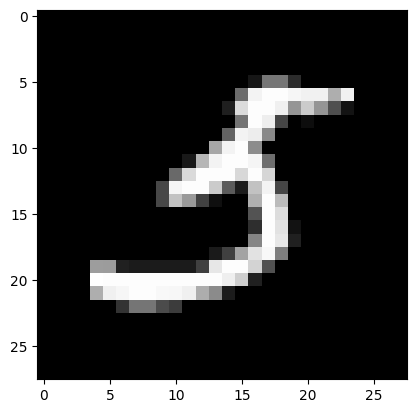

Prediction:  [0]
Label:  0


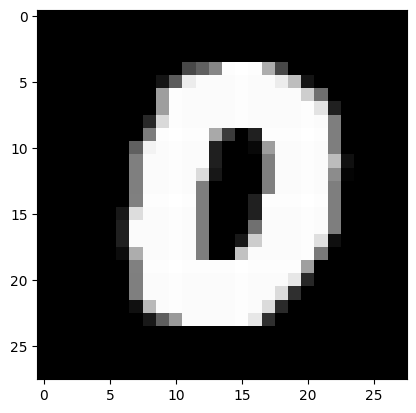

In [73]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)